In [114]:
import pandas as pd
import numpy as np

In [115]:
df = pd.read_csv('final_csv_test.csv')

In [116]:
df.tail()

,id,EDA,TEMP,BVP,HR
451265,S35,0.229625,99999.0,3.92,99999.0
451266,S35,0.229625,99999.0,9.85,99999.0
451267,S35,0.228344,99999.0,14.94,99999.0
451268,S35,0.229625,99999.0,19.16,99999.0
451269,S35,0.228344,99999.0,22.43,99999.0


In [117]:
df.isna().sum()

id      0
EDA     0
TEMP    0
BVP     0
HR      0
dtype: int64

In [82]:
# REPLACE 99999 by N/A for simplifiaction
df.replace(99999.0, 'na', inplace=True)

In [83]:
df.isnull().sum()

id      0
EDA     0
TEMP    0
BVP     0
HR      0
dtype: int64

In [84]:
df.head()

,id,EDA,TEMP,BVP,HR
0,S02,4.000000,4.0,64.0,1.0
1,S02,0.000000,34.79,-0.0,118.0
2,S02,0.622764,34.79,-0.0,113.5
3,S02,0.759875,34.79,-0.0,93.0
4,S02,0.883157,34.79,-0.0,93.25


In [85]:
na_count = (df == 'na').mean()
na_count

id      0.000000
EDA     0.000000
TEMP    0.000412
BVP     0.000000
HR      0.750695
dtype: float64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451270 entries, 0 to 451269
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      451270 non-null  object 
 1   EDA     451270 non-null  float64
 2   TEMP    451270 non-null  object 
 3   BVP     451270 non-null  float64
 4   HR      451270 non-null  object 
dtypes: float64(2), object(3)
memory usage: 17.2+ MB


In [87]:
target_column = 'HR'
df[target_column] = df[target_column].apply(lambda x: np.random.uniform(60, 180) if x == "na" else x)

# impute TEMP column
# Replace 'na' strings with np.nan in column 'A'
df['TEMP'] = df['TEMP'].replace('na', np.nan)

# Impute missing values in column 'A' using the mean of column 'A'
df['TEMP'] = df['TEMP'].fillna(df['TEMP'].mean())

# # Save the updated DataFrame back to the same CSV file
# file_path = 'combined_csv_test_HR.csv'
# df.to_csv(file_path, index=False)

In [88]:
df.tail()

,id,EDA,TEMP,BVP,HR
451265,S35,0.229625,31.29009,3.92,126.919783
451266,S35,0.229625,31.29009,9.85,75.116153
451267,S35,0.228344,31.29009,14.94,82.653791
451268,S35,0.229625,31.29009,19.16,141.466866
451269,S35,0.228344,31.29009,22.43,82.748756


In [89]:
na_count = (df == 'na').mean()
na_count

id      0.0
EDA     0.0
TEMP    0.0
BVP     0.0
HR      0.0
dtype: float64

<Axes: >

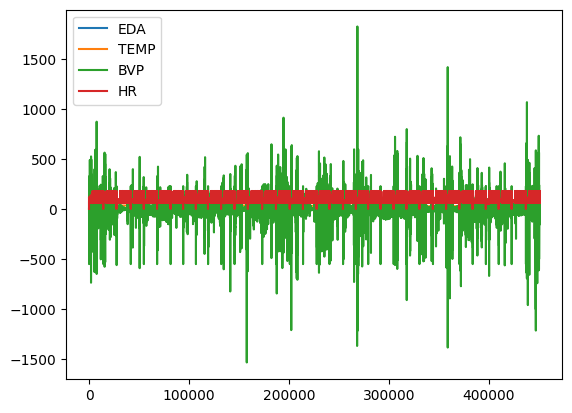

In [90]:
df.plot()

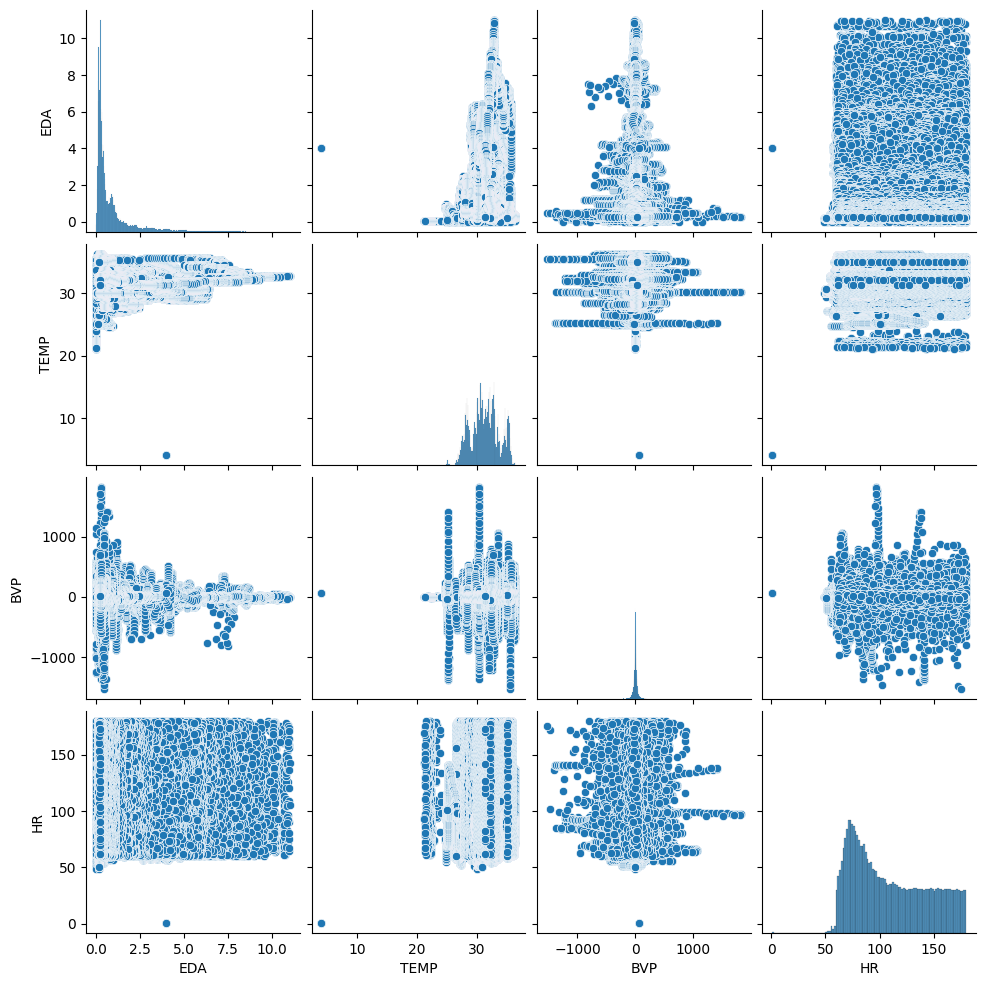

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)

# Show the plot
plt.show()

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451270 entries, 0 to 451269
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      451270 non-null  object 
 1   EDA     451270 non-null  float64
 2   TEMP    451270 non-null  float64
 3   BVP     451270 non-null  float64
 4   HR      451270 non-null  float64
dtypes: float64(4), object(1)
memory usage: 17.2+ MB


In [93]:
na_count = (df == 'na').sum()
na_count

id      0
EDA     0
TEMP    0
BVP     0
HR      0
dtype: int64

In [94]:
df.describe()

,EDA,TEMP,BVP,HR
count,451270.000000,451270.000000,451270.000000,451270.000000
mean,0.957080,31.290090,0.023578,110.031777
std,1.324882,2.336219,67.463498,35.130901
min,0.000000,4.000000,-1531.900000,1.000000
25%,0.240890,29.690000,-13.710000,78.820000
50%,0.430794,31.310000,1.300000,102.576620
75%,1.040876,32.810000,15.620000,139.939790
max,11.005073,36.390000,1822.090000,179.999865


In [95]:
# Skewed data to normal data

from scipy import stats
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=False)
df['EDA'] = pt.fit_transform(df[['EDA']])

In [96]:
# !pip install ydata-profiling

In [97]:
from ydata_profiling import ProfileReport

# Read the CSV file into a dataframe
#df = pd.read_csv(r'C:\Users\sahus\Stress-Prediction\final_csv_test.csv')

# Generate a profiling report
profile = ProfileReport(df, title="Data Profile Report", explorative=True)

# Save the report to an HTML file
profile.to_file("data_profile.html")

print("The profiling report has been generated!")


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 124.31it/s]

The profiling report has been generated!


In [98]:
replace_dict = {f'S{str(i).zfill(2)}': str(i) for i in range(2, 36)} 
df['id'] = df['id'].replace(replace_dict)
df.tail()

,id,EDA,TEMP,BVP,HR
451265,35,0.175162,31.29009,3.92,126.919783
451266,35,0.175162,31.29009,9.85,75.116153
451267,35,0.174420,31.29009,14.94,82.653791
451268,35,0.175162,31.29009,19.16,141.466866
451269,35,0.174420,31.29009,22.43,82.748756


c:\Program Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

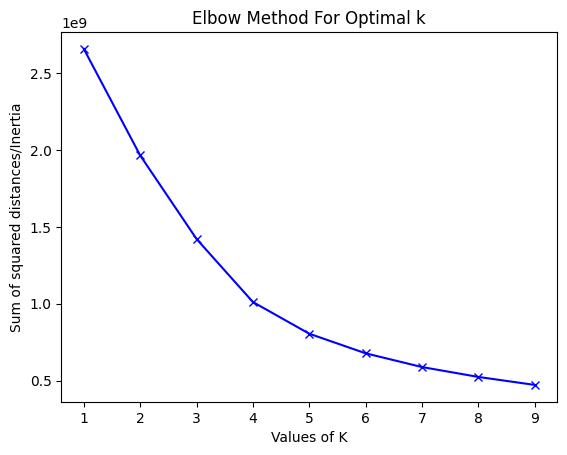

In [99]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

c:\Program Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Program Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

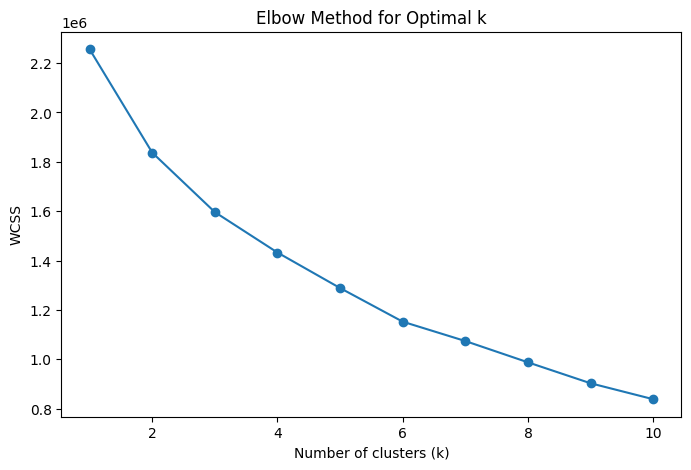

In [100]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
 
 
# Assume df is your DataFrame with unlabeled data
X = df.values  # Convert DataFrame to array
 
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 
# Elbow Method to find optimal k
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
 
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()


In [101]:
k_optimal = 2 # Set optimal k based on elbow plot
kmeans = KMeans(n_clusters=k_optimal,  n_init=100, init="k-means++")
cluster_labels = kmeans.fit_predict(X_scaled)

c:\Program Files\Python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


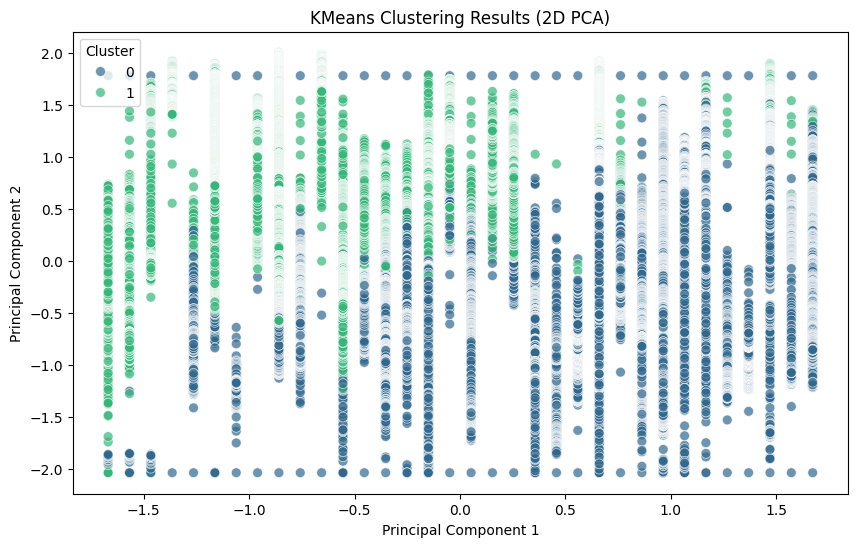

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=cluster_labels, palette='viridis', s=50, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans Clustering Results (2D PCA)")
plt.legend(title="Cluster")
plt.show()

  id       EDA   TEMP   BVP      HR  Cluster
0  2  0.563729   4.00  64.0    1.00        0
1  2 -0.000000  34.79  -0.0  118.00        0
2  2  0.333482  34.79  -0.0  113.50        1
3  2  0.367651  34.79  -0.0   93.00        1
4  2  0.392873  34.79  -0.0   93.25        1


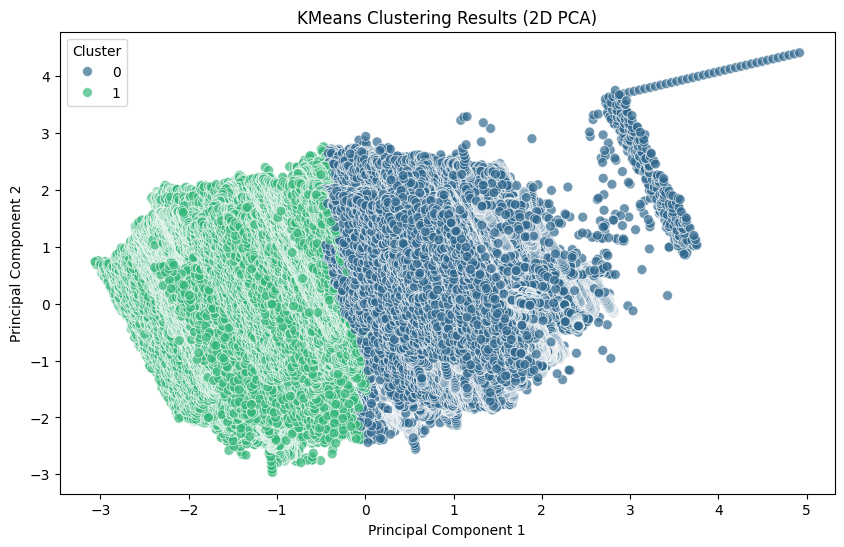

In [103]:
# Add cluster labels to DataFrame
df['Cluster'] = cluster_labels
print(df.head())
 
# Visualize with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
 
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', s=50, alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans Clustering Results (2D PCA)")
plt.legend(title="Cluster")
plt.show()
 
# Analyze cluster centers
#cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
#centers_df = pd.DataFrame(cluster_centers, columns=df.columns[:-1])  # Assuming last column is 'Cluster'
#print("Cluster Centers:\n", centers_df)
 
# Check cluster sizes
#print(df['Cluster'].value_counts())

In [104]:
#tsne = TSNE(n_components=2, perplexity=30, random_state=42)
#X_tsne = tsne.fit_transform(X)
 
# # Plot t-SNE results with cluster labels
# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
# plt.colorbar(scatter, label='Cluster')
# plt.title("t-SNE Clustering Visualization")
# plt.xlabel("t-SNE Component 1")
# plt.ylabel("t-SNE Component 2")
# plt.show()

C:\Users\sahus\AppData\Local\Temp\ipykernel_19736\882928629.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[col], color='indianred')
C:\Users\sahus\AppData\Local\Temp\ipykernel_19736\882928629.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[col], color='indianred')
C:\Users\sah

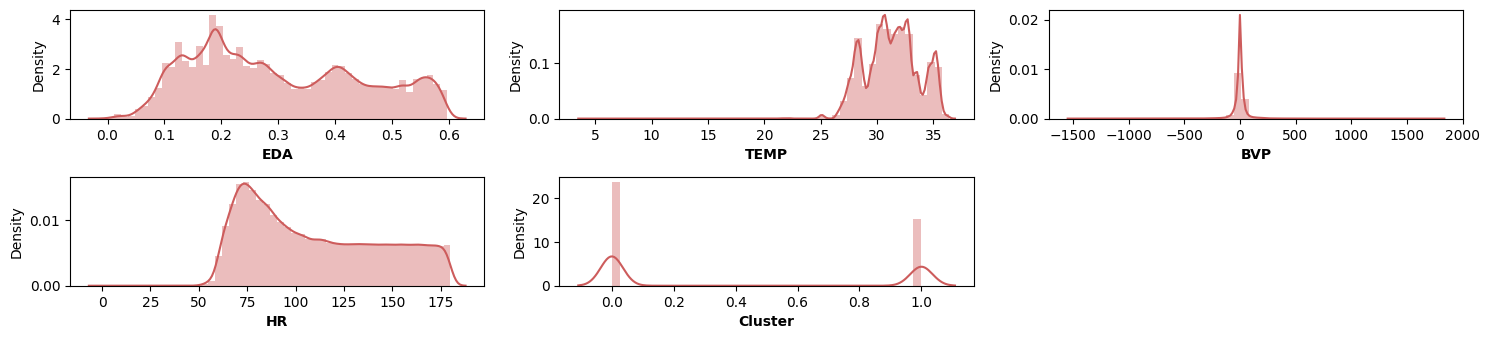

In [105]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [106]:
cluster_df = pd.read_csv('cluster_test.csv')
cluster_df.head()

,Unnamed: 0,EDA,TEMP,BVP,HR,Cluster
0,0,0.563729,4.00,64.0,1.00,0
1,1,-0.000000,34.79,-0.0,118.00,0
2,2,0.333482,34.79,-0.0,113.50,1
3,3,0.367651,34.79,-0.0,93.00,1
4,4,0.392873,34.79,-0.0,93.25,1


In [107]:
cluster_df['id'] = df['id']
cluster_df.head()

,Unnamed: 0,EDA,TEMP,BVP,HR,Cluster,id
0,0,0.563729,4.00,64.0,1.00,0,2
1,1,-0.000000,34.79,-0.0,118.00,0,2
2,2,0.333482,34.79,-0.0,113.50,1,2
3,3,0.367651,34.79,-0.0,93.00,1,2
4,4,0.392873,34.79,-0.0,93.25,1,2


In [108]:
# Desired order of columns
new_order = ['id', 'EDA', 'TEMP', 'BVP','HR','Cluster']

# Reorder the DataFrame
df_reordered = cluster_df[new_order]
df_reordered.tail()

,id,EDA,TEMP,BVP,HR,Cluster
451265,35,0.175162,31.29009,3.92,178.385886,0
451266,35,0.175162,31.29009,9.85,114.447211,0
451267,35,0.174420,31.29009,14.94,122.554359,0
451268,35,0.175162,31.29009,19.16,142.719683,0
451269,35,0.174420,31.29009,22.43,157.481964,0


In [113]:
outcome_avg = df_reordered.groupby('id').mean()
outcome_avg

,EDA,TEMP,BVP,HR,Cluster
id,,,,,
10,0.373991,32.213967,-0.000040,123.343514,0.694250
11,0.225461,27.544106,-0.010789,123.618973,0.063095
12,0.556520,32.759741,0.052389,119.121295,0.998131
13,0.234049,35.205327,0.125032,118.964781,0.673642
14,0.291636,31.488274,0.002068,122.251221,0.534918
15,0.236095,30.885455,-0.020022,122.877863,0.265954
16,0.294121,30.184080,-0.019586,122.958105,0.398389
17,0.248205,32.410437,0.023418,122.265634,0.446098
18,0.505267,30.491259,-0.001150,121.231282,0.903443
